In [2]:
import gauss_decomp as gdc
import numpy as np
from astropy.io import fits
import os
import matplotlib.pyplot as plt
from matplotlib import colors
from iris_lmsalpy import extract_irisL2data as ei
from scipy.io import readsav
from iris_lmsalpy import saveall as sv
import glob
import matplotlib

In [3]:
os.environ['path']= '/Users/souvikb/various_analysis/GaussSep/'
os.environ['results_dir'] = '/Users/souvikb/various_analysis/GaussSep/Results/'
b_vec_path = '/Users/souvikb/various_analysis/GaussSep/bose_codes/plage_heating/b_vec_data'
os.environ['IDL_saved_arrays'] = '/Users/souvikb/various_analysis/GaussSep/bose_codes/alignment_saved_files/20170305_164005/'

In [4]:
aligned_params = readsav(os.path.join(os.environ['IDL_saved_arrays'], 'alignment_params.sav'))


FileNotFoundError: [Errno 2] No such file or directory: '/alignment_params.sav'

NameError: name 'y_sampling_sot' is not defined

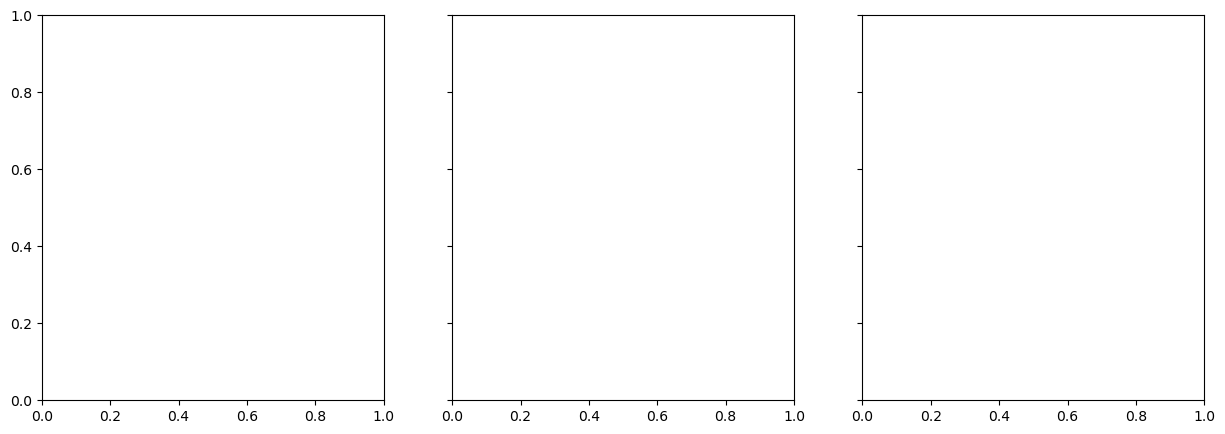

In [12]:
b_mag = readsav(b_vec_path+'/bxbybz_20170305_164005.sav')
b_mag.keys()
Bx0_obs = b_mag['bx']
By0_obs = b_mag['by']
Bz0_obs = b_mag['bz']
fig, ax = plt.subplots(nrows=1, ncols =3,figsize=(15,5),sharex=True,sharey=True)
ax= ax.ravel()

im=ax[0].imshow(Bz0_obs, cmap='gray', vmax=500,vmin=-500,origin='lower', extent =[0,Bz0_obs.shape[1]*y_sampling_sot, 0,Bz0_obs.shape[0]*x_sampling_sot])
ax[0].set_title(r'B$_{z}$ (G)')
ax[0].set_xlabel('arcsec')
ax[0].set_ylabel('arcsec')
plt.colorbar(im, fraction=0.024)

im=ax[1].imshow(Bx0_obs, cmap='gray', vmax=200,vmin=-200,origin='lower',extent =[0,Bz0_obs.shape[1]*y_sampling_sot, 0,Bz0_obs.shape[0]*x_sampling_sot])
ax[1].set_title(r'B$_{x}$ (G)')
ax[1].set_xlabel('arcsec')
plt.colorbar(im, fraction=0.024)

im=ax[2].imshow(By0_obs, cmap='gray', vmax=200,vmin=-200,origin='lower',extent =[0,Bz0_obs.shape[1]*y_sampling_sot, 0,Bz0_obs.shape[0]*x_sampling_sot])
ax[2].set_title(r'B$_{y}$ (G)')
ax[2].set_xlabel('arcsec')
plt.colorbar(im, fraction=0.024)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
bz_abs = np.abs(Bz0_obs).ravel()
energy = B_energy_density.ravel()
mask = np.isfinite(bz_abs) & np.isfinite(energy) & (energy > 0)
hb = ax.hexbin(bz_abs[mask], energy[mask], gridsize=75, cmap='magma',
                 norm=colors.LogNorm())
ax.set_xlabel(r'$|B_z|$ (G)')
ax.set_ylabel('Energy density (J m$^{-3}$)')
ax.set_title('JPDF of |B_z| vs Magnetic Energy Density')
cbar = fig.colorbar(hb, ax=ax)
cbar.set_label('Counts per hexbin')
